In [30]:
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
img = np.load('ADC.npy')

In [32]:
img.shape

(480, 480, 19)

In [33]:
max_value = np.max(img)
min_value = np.min(img)

In [34]:
img = (img - min_value) / (max_value - min_value)

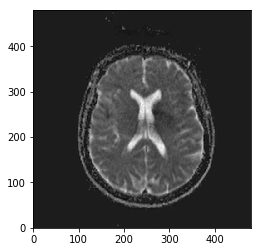

In [35]:
plt.imshow(img[:,:,11].T,cmap='gray',origin='lower')
plt.show()

In [36]:
mask_new = img.copy()
mask_new[np.where(mask_new> img[0,0,0])] = 1
mask_new[np.where(mask_new<= img[0,0,0])] = 0

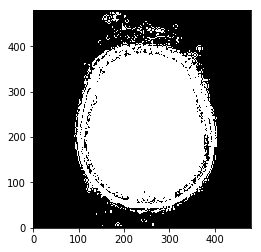

In [37]:
plt.imshow(mask_new[:,:,11].T,cmap='gray',origin='lower')
plt.show()

In [38]:
img1 = np.load('DWI.npy')

In [39]:
img1.shape

(480, 480, 19)

In [40]:
max_value = np.max(img1)
min_value = np.min(img1)
img1 = (img1 - min_value) / (max_value - min_value)

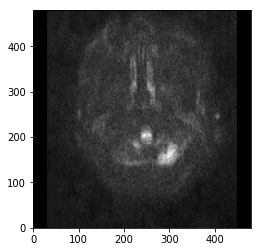

In [99]:
plt.imshow(img1[:,:,0].T,cmap='gray',origin='lower')
plt.show()

In [93]:
u, indices = np.unique(img1[:,:,0], return_inverse=True)
#t1 = u[np.argmax(np.bincount(indices))]

element_count = np.bincount(indices)

second_value = np.partition(element_count.flatten(), -2)[-2]
second_value = int(np.where(element_count == second_value)[0])
second_value = u[second_value]

In [94]:
second_value

0.07058823529411765

In [95]:
mask_new1 = img1.copy()
mask_new1[np.where(mask_new1> second_value)] = 1
mask_new1[np.where(mask_new1<= second_value)] = 0

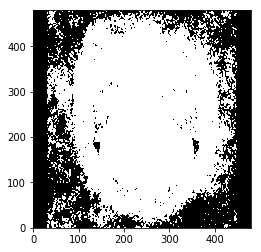

In [104]:
plt.imshow(mask_new1[:,:,4].T,cmap='gray',origin='lower')
plt.show()

In [126]:
img2 = np.load('Flair.npy')

In [127]:
img2.shape

(480, 480, 19)

In [128]:
max_value = np.max(img2)
min_value = np.min(img2)
img2 = (img2 - min_value) / (max_value - min_value)

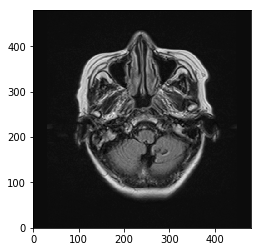

In [185]:
plt.imshow(img2[:,:,1].T,cmap='gray',origin='lower')
plt.show()

In [204]:
u, indices = np.unique(img2[:,:,0], return_inverse=True)
t1 = u[np.argmax(np.bincount(indices))]

element_count = np.bincount(indices)

t2 = np.partition(element_count.flatten(), -2)[-2]
t2 = int(np.where(element_count == t2)[0])
t2 = u[t2]

t3 = np.partition(element_count.flatten(), -2)[-3]
t3 = int(np.where(element_count == t3)[0])
t3 = u[t3]

t4 = np.partition(element_count.flatten(), -2)[-4]
t4 = int(np.where(element_count == t4)[0])
t4 = u[t4]

t5 = np.partition(element_count.flatten(), -2)[-5]
t5 = int(np.where(element_count == t5)[0])
t5 = u[t5]

t6 = np.partition(element_count.flatten(), -2)[-6]
t6 = int(np.where(element_count == t6)[0])
t6 = u[t6]

t7 = np.partition(element_count.flatten(), -2)[-7]
t7 = int(np.where(element_count == t7)[0])
t7 = u[t7]

t8 = np.partition(element_count.flatten(), -2)[-8]
t8 = int(np.where(element_count == t8)[0])
t8 = u[t8]

In [205]:
print(t1,t2,t3,t4,t5,t6,t7,t8)

0.047058823529411764 0.043137254901960784 0.050980392156862744 0.054901960784313725 0.058823529411764705 0.06274509803921569 0.06666666666666667 0.22745098039215686


In [300]:
mask_new2 = img2.copy()
mask_new2[np.where(mask_new2 <= 0.1)] = 0
mask_new2[np.where(mask_new2 > 0.1)] = 1

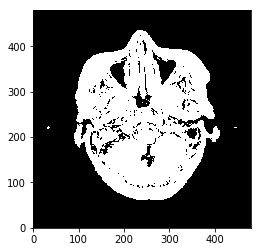

In [301]:
plt.imshow(mask_new2[:,:,1].T,cmap='gray',origin='lower')
plt.show()

In [302]:
import tqdm

In [303]:
for i in range(mask_new2.shape[2]):
    #print(i)
    img = mask_new2[:,:,i]
    for x in range(img.shape[0]):
        if x == 0:
            continue
        if x == 479:
            continue
        for y in range(img.shape[1]):
            if y == 0:
                continue
            if y ==480:
                continue
                
            current = mask_new2[x,y,i]
            if current == 1:
                continue
            else:
                flag = False
                top_flag = False
                bot_flag = False
                left_flag = False
                right_flag = False
                top = mask_new2[x,0:y,i]
                for value in top:
                    if value == 1:
                        top_flag = True
                        break
                        
                bot = mask_new2[x,y:-1,i]
                for value in bot:
                    if value == 1:
                        bot_flag = True
                        break
                        
                left = mask_new2[0:x,y,i]
                for value in left:
                    if value == 1:
                        left_flag = True
                        break
                right = mask_new2[x:-1,y,i]
                for value in right:
                    if value == 1:
                        right_flag = True
                        break
                flag = top_flag&bot_flag&left_flag&right_flag
                if flag:
                    mask_new2[x,y,i] = 1   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [304]:
result = mask_new2

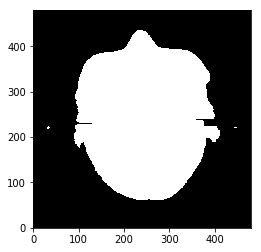

In [325]:
plt.imshow(mask_new2[:,:,1].T,cmap='gray',origin='lower')
plt.show()

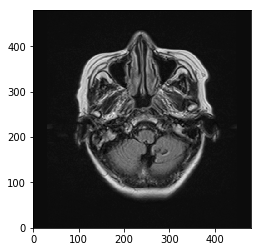

In [326]:
plt.imshow(img2[:,:,1].T,cmap='gray',origin='lower')
plt.show()

In [331]:
img2 = np.load('Flair.npy')

In [332]:
test = img2 * mask_new2

In [334]:
max_value = np.max(test)
min_value = np.min(test)
test = (test - min_value) / (max_value - min_value)

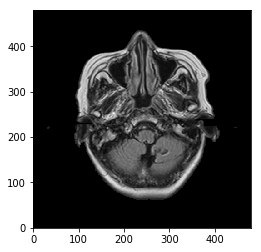

In [335]:
plt.imshow(test[:,:,1].T,cmap='gray',origin='lower')
plt.show()

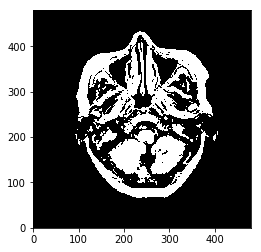

In [207]:
plt.imshow(mask_new2[:,:,1].T,cmap='gray',origin='lower')
plt.show()

In [18]:
img3 = np.load('T1.npy')

In [19]:
img3.shape

(480, 480, 19)

In [229]:
max_value = np.max(img3)
min_value = np.min(img3)
img3 = (img3 - min_value) / (max_value - min_value)

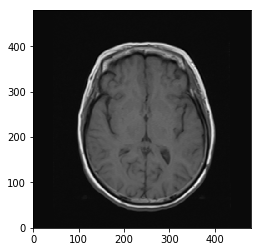

In [230]:
plt.imshow(img3[:,:,int(img3.shape[2]/2)].T,cmap='gray',origin='lower')
plt.show()

In [235]:
u, indices = np.unique(img3[:,:,0], return_inverse=True)
t1 = u[np.argmax(np.bincount(indices))]

element_count = np.bincount(indices)

t2 = np.partition(element_count.flatten(), -2)[-2]
t2 = int(np.where(element_count == t2)[0])
t2 = u[t2]

t3 = np.partition(element_count.flatten(), -2)[-3]
t3 = int(np.where(element_count == t3)[0])
t3 = u[t3]

t4 = np.partition(element_count.flatten(), -2)[-4]
t4 = int(np.where(element_count == t4)[0])
t4 = u[t4]

t5 = np.partition(element_count.flatten(), -2)[-5]
t5 = int(np.where(element_count == t5)[0])
t5 = u[t5]

t6 = np.partition(element_count.flatten(), -2)[-6]
t6 = int(np.where(element_count == t6)[0])
t6 = u[t6]

t7 = np.partition(element_count.flatten(), -2)[-7]
t7 = int(np.where(element_count == t7)[0])
t7 = u[t7]

t8 = np.partition(element_count.flatten(), -2)[-8]
t8 = int(np.where(element_count == t8)[0])
t8 = u[t8]

print(t1,t2,t3,t4,t5,t6,t7,t8)

0.06274509803921569 0.06666666666666667 0.07058823529411765 0.07450980392156863 0.0784313725490196 0.08235294117647059 0.30196078431372547 0.2980392156862745


In [250]:
mask_new3 = img3.copy()
mask_new3[np.where(mask_new3 <= 0.1)] = 0
mask_new3[np.where(mask_new3 > 0.1)] = 1

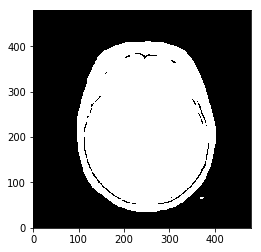

In [251]:
plt.imshow(mask_new3[:,:,int(img3.shape[2]/2)].T,cmap='gray',origin='lower')
plt.show()

In [21]:
img4 = np.load('T2.npy')

In [22]:
img4.shape

(480, 480, 19)

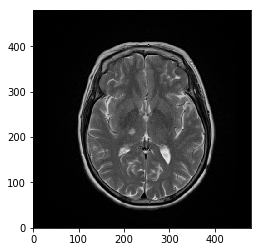

In [23]:
plt.imshow(img4[:,:,int(img4.shape[2]/2)].T,cmap='gray',origin='lower')
plt.show()

In [418]:
T1_path = '/home/ricardo/zhang/T1/baihejieMR_197226_13257465_20170612.npy'

In [417]:
T2_path = '/home/ricardo/zhang/T2/baihejieMR_197226_13257465_20170612.npy'

In [474]:
path_save = 'output'
save_path = os.path.join(path_save, T2_path.split('/')[-2], T2_path.split('/')[-1])

In [475]:
save_path

'output/T2/baihejieMR_197226_13257465_20170612.npy'

In [462]:
img_t1 = np.load(T1_path)
img_t2 = np.load(T2_path)

In [463]:
print(img_t1.shape,img_t2.shape)

(256, 256, 19) (256, 256, 19)


In [466]:
img_t1[np.where(img_t1<0)] = 0

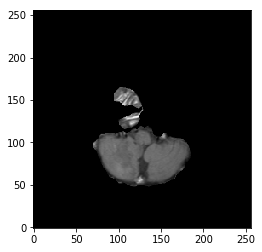

In [467]:
plt.imshow(img_t1[:,:,0].T,cmap='gray',origin='lower')
plt.show()

In [468]:
new_img = cv2.resize(img_t1, (240, 240), interpolation=cv2.INTER_CUBIC) 

In [470]:
np.max(new_img)

966.9545

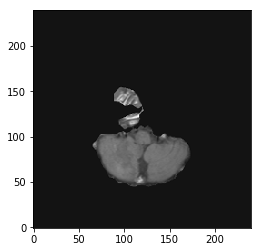

In [469]:
plt.imshow(new_img[:,:,0].T,cmap='gray',origin='lower')
plt.show()

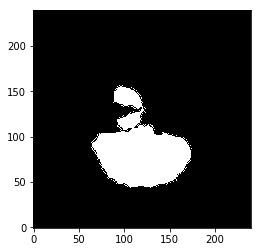

In [461]:
mask_t1 = new_img.copy()
mask_t1[np.where(mask_t1 < 0)] = 0
mask_t1[np.where(mask_t1 > 0)] = 1

plt.imshow(mask_t1[:,:,0].T,cmap='gray',origin='lower')
plt.show()

In [457]:
np.max(new_img)

966.9545

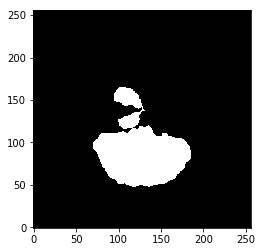

In [441]:
mask_t1 = img_t1.copy()
mask_t1[np.where(mask_t1 <= 0)] = 0
mask_t1[np.where(mask_t1 > 0)] = 1

plt.imshow(mask_t1[:,:,0].T,cmap='gray',origin='lower')
plt.show()

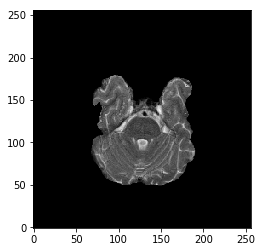

In [433]:
plt.imshow(img_t2[:,:,4].T,cmap='gray',origin='lower')
plt.show()

In [446]:
data_root = '/home/ricardo/zhang/'

In [447]:
patient_name_list = os.listdir(data_root)

In [448]:
patient_name_list

['T1', 'T2']

In [451]:
path_list=[]

In [452]:
for i in range(len(patient_name_list)):
    patient_path = os.path.join(data_root, patient_name_list[i])
    patient_image_list = os.listdir(patient_path)
    for j in range(len(patient_image_list)):
        path = os.path.join(patient_path, patient_image_list[j])
        path_list.append(path)

In [453]:
path_list

['/home/ricardo/zhang/T1/baijingheMR_90659_13675815_20180503.npy',
 '/home/ricardo/zhang/T1/caoqinanMR_224088_13658021_20180419.npy',
 '/home/ricardo/zhang/T1/chendongeMR_176715_13090317_20170112.npy',
 '/home/ricardo/zhang/T1/caifujiaoMR_219000_13590839_20180227.npy',
 '/home/ricardo/zhang/T1/baihejieMR_197226_13257465_20170612.npy',
 '/home/ricardo/zhang/T2/baijingheMR_90659_13675815_20180503.npy',
 '/home/ricardo/zhang/T2/caoqinanMR_224088_13658021_20180419.npy',
 '/home/ricardo/zhang/T2/chendongeMR_176715_13090317_20170112.npy',
 '/home/ricardo/zhang/T2/caifujiaoMR_219000_13590839_20180227.npy',
 '/home/ricardo/zhang/T2/baihejieMR_197226_13257465_20170612.npy']

In [544]:
img_gt = np.load('/home/ricardo/Desktop/zhang/T1/baihejieMR_197226_13257465_20170612.npy')
img_gt_gt = np.load('/home/ricardo/Desktop/Task11/output/gt/T1/baihejieMR_197226_13257465_20170612.npy')
img_pre = np.load('/home/ricardo/Desktop/Task11/output/T1/baihejieMR_197226_13257465_20170612.npy')

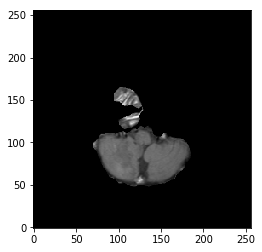

In [548]:
plt.imshow(img_gt[:,:,0].T,cmap='gray',origin='lower')
plt.show()

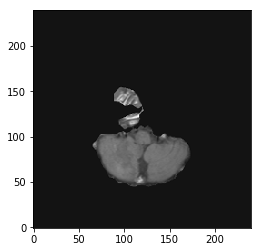

In [547]:
plt.imshow(img_gt_gt[0,0,:,:].T,cmap='gray',origin='lower')
plt.show()

In [545]:
img_gt_gt[0,:,:,:].shape

(15, 240, 240)

In [504]:
img_gt_gt.shape

(2, 15, 240, 240)

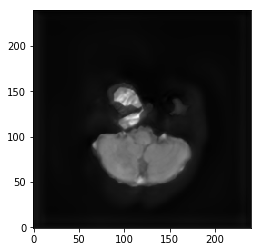

In [546]:
plt.imshow(img_pre[0,:,:].T,cmap='gray',origin='lower')
plt.show()

In [500]:
img_pre.shape

(64, 240, 240)

In [492]:
img_gt1 = np.load('/home/ricardo/Desktop/zhang/T2/baihejieMR_197226_13257465_20170612.npy')
img_pre1 = np.load('/home/ricardo/Desktop/Task11/output/T2/baihejieMR_197226_13257465_20170612.npy')

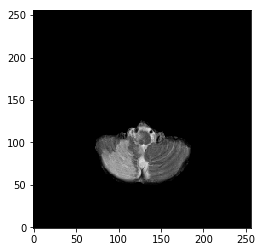

In [493]:
plt.imshow(img_gt1[:,:,0].T,cmap='gray',origin='lower')
plt.show()

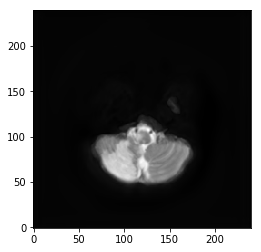

In [494]:
plt.imshow(img_pre1[0,:,:].T,cmap='gray',origin='lower')
plt.show()

In [409]:
import os
import numpy as np
from tqdm import tqdm

In [405]:
def mask_cacl(img):
    
    # init mask
    mask = img.copy()
    mask[np.where(mask <= 0.1)] = 0
    mask[np.where(mask > 0.1)] = 1
    
    # opt mask
    for i in range(mask.shape[2]):

        for x in range(mask.shape[0]):
            if x == 0:
                continue
            if x == mask.shape[0] - 1:
                continue
            
            for y in range(mask.shape[1]):
                if y == 0:
                    continue
                if y == mask.shape[1] - 1:
                    continue
                
                # current point
                if mask[x,y,i] == 1:
                    continue
                    
                else:
                    # set flag
                    flag = False
                    top_flag = False
                    bot_flag = False
                    left_flag = False
                    right_flag = False
                    
                    # judge flag
                    top = mask[x,0:y,i]
                    for value in top:
                        if value == 1:
                            top_flag = True
                            break
                        
                    bot = mask[x,y:-1,i]
                    for value in bot:
                        if value == 1:
                            bot_flag = True
                            break
                        
                    left = mask[0:x,y,i]
                    for value in left:
                        if value == 1:
                            left_flag = True
                            break
                            
                    right = mask[x:-1,y,i]
                    for value in right:
                        if value == 1:
                            right_flag = True
                            break
                            
                    # cacl final flag
                    flag = top_flag&bot_flag&left_flag&right_flag
                    if flag:
                        mask[x,y,i] = 1 
                        
    return mask 

In [411]:
path = '/home/ricardo/Desktop/zhang'

In [412]:
file_add = []

In [413]:
cases = os.listdir(path)

In [414]:
for case in cases:
    case_add = os.path.join(path,case)
    files = os.listdir(case_add)
    for file in files:
        file_add.append(os.path.join(case_add, file))

In [416]:
for each in tqdm(file_add):
    # load file
    img = np.load(each)
    # cacl mask
    mask = mask_cacl(img)
    # apply mask
    img = img * mask
    # normalise
    max_value = np.max(img)
    min_value = np.min(img)
    img = (img - min_value) / (max_value - min_value)
    np.save(each, img)

AttributeError: 'str' object has no attribute 'add'